In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
train = pd.read_csv('train.csv')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

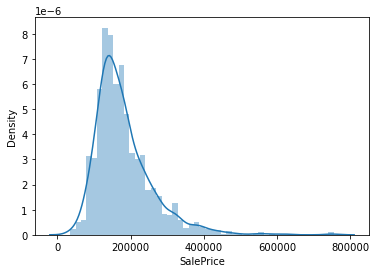

In [5]:
sns.distplot(train['SalePrice'])

In [8]:
#Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.
train.SalePrice = np.log1p(train.SalePrice)
y = train.SalePrice

In [13]:
train['SalePrice'].describe()

count    1460.000000
mean        2.566329
std         0.030660
min         2.438886
25%         2.547498
50%         2.565066
75%         2.585787
max         2.676523
Name: SalePrice, dtype: float64

In [10]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
# Calculate the % of missing value in the data
train.isnull().sum()/len(train)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [16]:
# Some numerical features are actually really categories
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [17]:
train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [18]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.815005
GrLivArea        0.697001
GarageCars       0.680156
ExterQual        0.674425
KitchenQual      0.664669
BsmtQual         0.650361
GarageArea       0.649601
TotalBsmtSF      0.609138
FullBath         0.593950
1stFlrSF         0.593533
YearBuilt        0.587947
YearRemodAdd     0.566811
GarageYrBlt      0.542620
TotRmsAbvGrd     0.532015
Fireplaces       0.488470
Alley            0.475217
HeatingQC        0.474763
MasVnrArea       0.425387
PoolQC           0.419780
BsmtFinSF1       0.369589
LotFrontage      0.354315
WoodDeckSF       0.333100
BsmtExposure     0.323745
OpenPorchSF      0.318779
2ndFlrSF         0.317684
HalfBath         0.314638
PavedDrive       0.309843
FireplaceQu      0.304061
BsmtFinType1     0.299912
LotArea          0.255382
BsmtFullBath     0.235692
BsmtUnfSF        0.221007
BedroomAbvGr     0.211759
BsmtCond         0.209114
GarageQual       0.192334
GarageCond      

In [19]:
Indentifying the row indexes for non-residential zones
rem_index = df[(df.MSZoning == 'A (agr)') | (df.MSZoning == 'I (all)') | 
               (df.MSZoning == 'C (all)') | (df.MSZoning == 'FV')].index
# Removing the rows identified
df.drop(index=rem_index, inplace=True)
print(f"Total {df.shape[0]} rows, {df.shape[1]} columns (after removing {len(rem_index)} non-residential properties)")
df.MSZoning.value_counts()


SyntaxError: invalid syntax (Temp/ipykernel_23960/2764155382.py, line 1)

In [21]:
train.corr()['SalePrice'].sort_values()

LotShape        -0.285557
EnclosedPorch   -0.149860
KitchenAbvGr    -0.147227
LowQualFinSF    -0.038467
YrSold          -0.037897
LandSlope       -0.036707
OverallCond     -0.032208
BsmtFinType2    -0.030259
MiscVal         -0.019939
Id              -0.017318
BsmtHalfBath    -0.003625
BsmtFinSF2       0.006248
Utilities        0.012329
ExterCond        0.052369
3SsnPorch        0.055326
Street           0.058679
PoolArea         0.068439
ScreenPorch      0.121453
Functional       0.138014
GarageCond       0.174306
GarageQual       0.192334
BsmtCond         0.209114
BedroomAbvGr     0.211759
BsmtUnfSF        0.221007
BsmtFullBath     0.235692
LotArea          0.255382
BsmtFinType1     0.299912
FireplaceQu      0.304061
PavedDrive       0.309843
HalfBath         0.314638
2ndFlrSF         0.317684
OpenPorchSF      0.318779
BsmtExposure     0.323745
WoodDeckSF       0.333100
LotFrontage      0.354315
BsmtFinSF1       0.369589
PoolQC           0.419780
MasVnrArea       0.425387
HeatingQC   